In [1]:
import pandas as pd

import numpy as np
import seaborn as sns

In [2]:
species1 = 'human'
species2 = 'chimp'

output_folder = f'/home/olga/data_sm/kmer-hashing/orthologues/{species1}-vs-{species2}'
print(f"output_folder: {output_folder}")
! ls -lha $output_folder

output_folder: /home/olga/data_sm/kmer-hashing/orthologues/human-vs-chimp
total 1.3G
drwxrwxr-x 2 olga olga 4.0K Nov 11 13:36 .
drwxrwxr-x 8 olga olga 4.0K Nov 11 11:39 ..
-rw-rw-r-- 1 olga olga  344 Oct  1 10:23 n_homology_types.csv
-rw-rw-r-- 1 olga olga 551M Oct  1 21:44 non_coding_orthology_nsubset1000_seed0.csv
-rw-rw-r-- 1 olga olga 681M Oct  1 19:51 protein_coding_orthology_nsubset1000_seed0.csv
-rw-rw-r-- 1 olga olga 2.3M Nov 11 13:36 protein_coding_orthology_nsubset1000_seed0.parquet


In [ ]:
n_subset = 1000
csv = f"{output_folder}/protein_coding_orthology_nsubset{n_subset}_seed0.csv"
protein_coding_peptide_orthology = pd.read_csv(csv)
protein_coding_peptide_orthology.head()

In [ ]:
subset = protein_coding_peptide_orthology.query("(molecule == 'protein' & ksize == 7) | "
                                                "(molecule == 'protein' & ksize == 8) | " 
                                                "(molecule == 'dayhoff' & ksize == 15) | "
                                                "(molecule == 'dayhoff' & ksize == 16) | "
                                                "(molecule == 'hydrophobic-polar' & ksize == 32) |"
                                                "(molecule == 'hydrophobic-polar' & ksize == 31)"
                                               )
subset[['molecule', 'ksize']].drop_duplicates()

In [ ]:
subset['id1_id2'] = subset['id1'] + "_" + subset['id2']
subset['encoding_ksize'] = subset['molecule'] + "_" + subset['ksize'].astype(str)
subset.head()

In [ ]:
df = subset[['id1_id2', 'encoding_ksize', 'jaccard']].drop_duplicates()

In [ ]:
pivoted = df.pivot(index='id1_id2', columns='encoding_ksize', values='jaccard')
pivoted.head()

In [ ]:
metadata = subset.drop(['ksize', 'jaccard', 'molecule', 'encoding_ksize'], axis=1).drop_duplicates().set_index('id1_id2')
metadata.head()

In [ ]:
sns.pairplot(pivoted)

In [ ]:
pivoted_metadata = pivoted.join(metadata)

In [ ]:
sns.pairplot(pivoted_metadata, hue='Chimpanzee homology type')

In [ ]:
orthology_categories = ['No homology', 'ortholog_one2one', 'ortholog_one2many', 'ortholog_many2many', ]
palette = dict(zip(orthology_categories, ['grey'] + sns.color_palette()))

In [ ]:
sns.pairplot(pivoted_metadata, hue='Chimpanzee homology type', palette=palette)

In [ ]:
sns.pairplot(pivoted_metadata.fillna(0), hue='Chimpanzee homology type', palette=palette)

In [ ]:
quantitative_cols = '%id. target Chimpanzee gene identical to query gene	%id. query gene identical to target Chimpanzee gene	Chimpanzee Gene-order conservation score	Chimpanzee Whole-genome alignment coverage	dN with Chimpanzee	dS with Chimpanzee'.split('\t')

In [ ]:
pivoted_metadata = pivoted.join(metadata)
pivoted_metadata[quantitative_cols] = pivoted_metadata[quantitative_cols].replace('No homology', -0.1)

In [ ]:
pivoted_metadata = pivoted.join(metadata)
pivoted_metadata[quantitative_cols] = pivoted_metadata[quantitative_cols].replace('No homology', -0.1).astype(float)
pivoted_metadata.head()

In [ ]:
jaccard_cols = 'dayhoff_15	dayhoff_16	hydrophobic-polar_31	hydrophobic-polar_32	protein_7	protein_8'.split('\t')

In [ ]:
sns.pairplot(pivoted_metadata[jaccard_cols + ['Chimpanzee homology type']], hue='Chimpanzee homology type', palette=palette)

In [ ]:
pivoted = df.pivot(index='id1_id2', columns='encoding_ksize', values='jaccard')
pivoted.head()

In [ ]:
np.random.normal(0, 0.0001)

In [ ]:
pivoted += np.random.normal(0, 0.0001, size=pivoted.size).reshape(pivoted.shape)

In [ ]:
hue = 'Chimpanzee homology type'
pivoted_joined = pivoted.join(metadata[hue])
pivoted_joined.head()

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue)

In [ ]:
sns.pairplot(pivoted_joined, hue=hue)

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette)

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette)

In [ ]:
pivoted = df.pivot(index='id1_id2', columns='encoding_ksize', values='jaccard')
pivoted += np.random.normal(0, 1e-9, size=pivoted.size).reshape(pivoted.shape)
pivoted.head()

In [ ]:
sns.pairplot(pivoted)

In [ ]:
pivoted = df.pivot(index='id1_id2', columns='encoding_ksize', values='jaccard')
pivoted.head()

In [ ]:
sns.pairplot(pivoted)

In [ ]:
hue = 'Chimpanzee homology type'
pivoted_joined = pivoted.join(metadata[hue])
pivoted_joined.head()

In [ ]:
orthology_categories = ['No homology', 'ortholog_one2one', 'ortholog_one2many', 'ortholog_many2many', ]
palette = dict(zip(orthology_categories, ['black'] + sns.color_palette()))

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette, diag_kind='hist')

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette, diag_kind='hist')

In [ ]:
orthology_categories = ['No homology', 'ortholog_one2one', 'ortholog_one2many', 'ortholog_many2many', ]
palette = dict(zip(orthology_categories, ['grey'] + sns.color_palette()))

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette, diag_kind='hist')

In [ ]:
pivoted = df.pivot(index='id1_id2', columns='encoding_ksize', values='jaccard')
pivoted += np.random.normal(0, 1e-6, size=pivoted.size).reshape(pivoted.shape)
pivoted.head()

In [ ]:
sns.pairplot(pivoted)

In [ ]:
hue = 'Chimpanzee homology type'
pivoted_joined = pivoted.join(metadata[hue])
pivoted_joined.head()

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette, diag_kind='kde')

In [ ]:
sns.pairplot(pivoted_joined.head(100), hue=hue, palette=palette, diag_kind='hist')

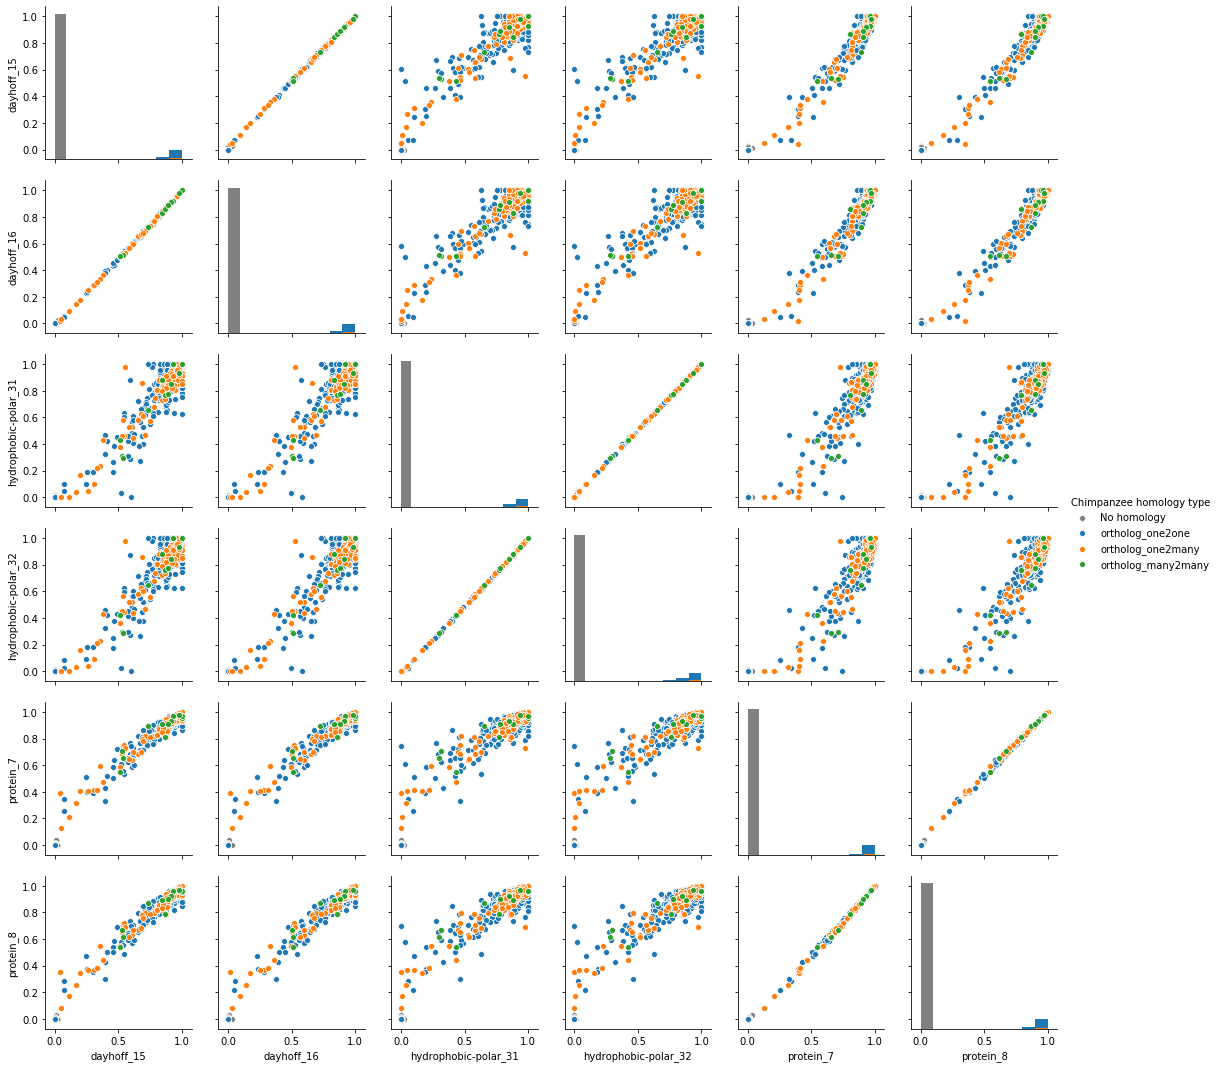

In [ ]:
sns.pairplot(pivoted_joined, hue=hue, palette=palette, diag_kind='hist')